[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/francisco-ortin/data-science-course/blob/main/unsupervised/pca.ipynb)
[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# Dimensionality reduction

This lab is about dimensionality reduction, which is aimed at reducing the number of input features (dimensions) in a dataset while preserving as much information as possible.
  
We will use the MNIST dataset, which is a dataset of 28x28 grayscale images of handwritten digits (0 to 9). The dataset contains 60,000 training images and 10,000 testing images. Each image is a 28x28 pixel square (784 features/pixels in total). Each pixel has a value between 0 and 255, representing the grayscale intensity. The train dataset is stored in `data/mnist_train.csv.zip` and the test dataset in `data/mnist_test.csv.zip`.

In [30]:
# make sure the required packages are installed
%pip install pandas numpy seaborn matplotlib scikit-learn  --quiet
# if running in colab, install the required packages and copy the necessary files
directory='data-science-course/unsupervised'
if get_ipython().__class__.__module__.startswith('google.colab'):
    !git clone https://github.com/francisco-ortin/data-science-course.git  2>/dev/null
    !cp --update {directory}/*.py .
    !mkdir -p img data
    !cp {directory}/data/* data/.

# import the required modules
from typing import Tuple, Optional
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score

TRAIN_FILE_NAME = 'data/mnist_train.csv.zip'
TEST_FILE_NAME = 'data/mnist_test.csv.zip'
ramdom_state= 42

Note: you may need to restart the kernel to use updated packages.


## Dataset

Let's load the dataset.

In [31]:
def load_data(csv_zip_file_name: str) -> Tuple[np.array, np.array]:
    """
    Load the MNIST dataset from a zip CSV file
    :param csv_zip_file_name: The name of the zip CSV file
    :return: (numpy array of features, numpy array of labels)
    """
    # Load the dataset from a zip CSV file
    data = pd.read_csv(csv_zip_file_name, compression='zip')
    X = data.iloc[:, 1:].values
    y = data.iloc[:, 0].values
    return X, y

X_train, y_train = load_data(TRAIN_FILE_NAME)
X_test, y_test = load_data(TEST_FILE_NAME)
print(f"Train dataset: X shape: {X_train.shape}, y shape: {y_train.shape}.")
print(f"Test dataset: X shape: {X_test.shape}, y shape: {y_test.shape}.")

Train dataset: X shape: (59999, 784), y shape: (59999,).
Test dataset: X shape: (9999, 784), y shape: (9999,).


## Dataset visualization

Now, we will visualize some images from the dataset.

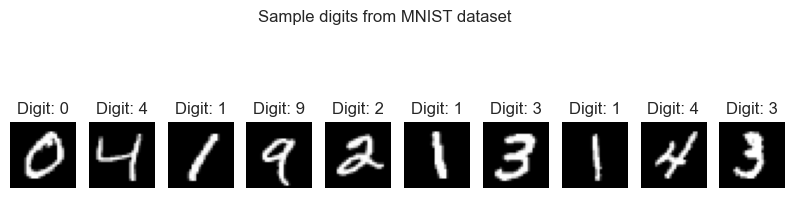

In [32]:
def visualize_samples(X: np.array, y: np.array, title: str, n_samples: int) -> None:
    fig, axes = plt.subplots(1, n_samples, figsize=(10, 3))
    for i in range(n_samples):
        axes[i].imshow(X[i].reshape(28, 28), cmap='gray')
        axes[i].axis('off')
        # show the digit label
        axes[i].set_title(f'Digit: {y[i]}')
    plt.suptitle(title)
    plt.show()

visualize_samples(X_train, y_train, 'Sample digits from MNIST dataset', 10)

## PCA reduction

We reduce the dimensionality of the training dataset to two dimensions, using PCA. PCA stands for [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis). PCA is a linear dimensionality reduction technique.

In [33]:
def pca_reduction(X: np.array, n_components: Optional[int]) -> Tuple[np.array, np.array, PCA]:
    """
    Perform PCA reduction to n_components
    :param X: The source dataset to be reduced
    :param n_components: the number of components (dimensions) to reduce to
    :return: The reduced dataset, the explained variance ratio per component and the PCA model
    """
    pca = PCA(n_components=n_components, random_state=ramdom_state)
    X_pca = pca.fit_transform(X)
    return X_pca, pca.explained_variance_ratio_, pca


X_train_PCA, _, _ = pca_reduction(X_train, 2)
print(f"PCA reduced dataset. X train shape: {X_train_PCA.shape}.")

PCA reduced dataset. X train shape: (59999, 2).


### Visualization of the PCA reduction

Since the reduced dataset has only two dimensions, we can visualize it. Let's see how the information in the training set is distributed, related to the data labels (10 different digits).

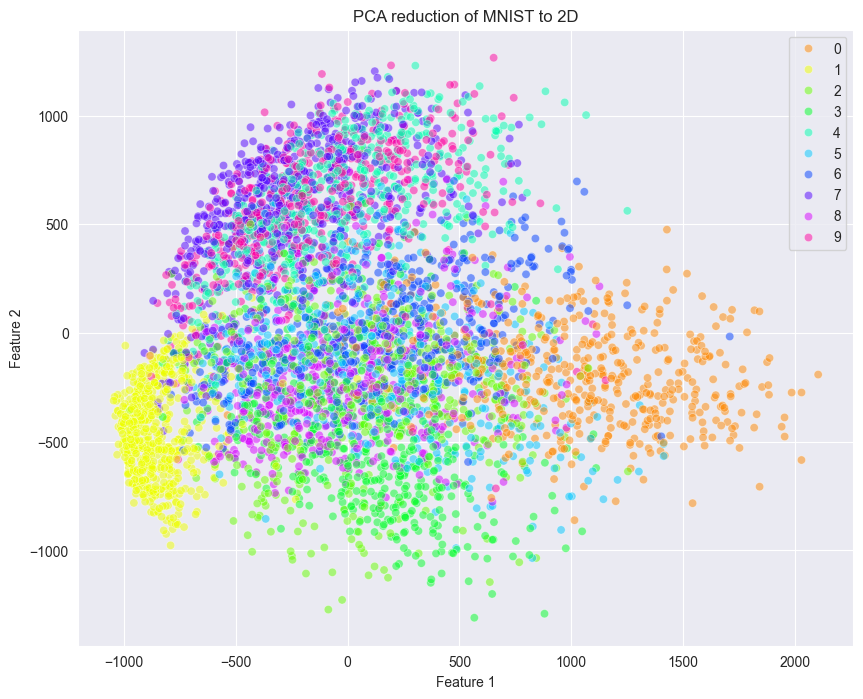

In [34]:
def visualize_2D(X: np.array, y: np.array, title: str) -> None:
    plt.figure(figsize=(10, 8))
    palette = sns.color_palette("hsv", 10)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=palette, legend='full', alpha=0.5)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


SAMPLES_TO_PLOT = 5_000
visualize_2D(X_train_PCA[:SAMPLES_TO_PLOT], y_train[:SAMPLES_TO_PLOT], 'PCA reduction of MNIST to 2D')

## ✨ Questions ✨

1. Take a look at the scatter plot and identify the two main digits that, after PCA reduction, are the easiest to separate
2. Why do you think these two digits are the easiest to separate?

### Answers

*Write your answers here.*



## t-SNE

t-SNE is another dimensionality reduction technique that is particularly well-suited for visualization purposes. t-SNE stands for [t-distributed stochastic neighbor embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).t-SNE is a nonlinear dimensionality reduction technique that preserves local structure in the data.

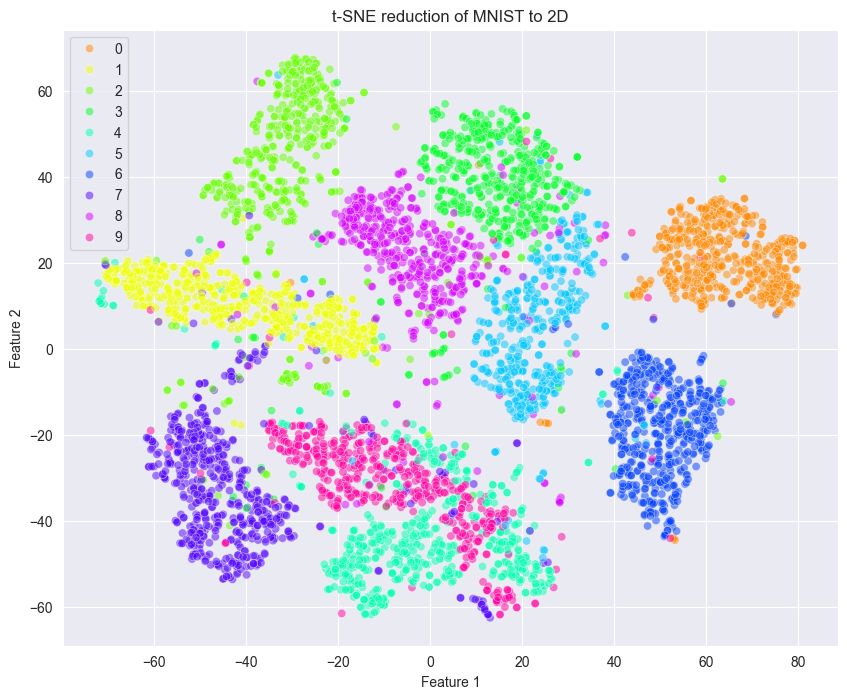

In [35]:
# Let's visualize the reduced dataset in two dimensions using t-SNE
def tsne_reduction(X: np.array, n_components: int) -> Tuple[np.array, TSNE]:
    tsne = TSNE(n_components=n_components, random_state=ramdom_state)
    X_tsne = tsne.fit_transform(X)
    return X_tsne, tsne

X_train_t_SNE, _ = tsne_reduction(X_train[:SAMPLES_TO_PLOT], 2)
visualize_2D(X_train_t_SNE, y_train[:SAMPLES_TO_PLOT], 't-SNE reduction of MNIST to 2D')

## ✨ Questions ✨

3. Compare the PCA and t-SNE visualizations. For this dataset, which technique seems to provide better separation?
4. What do you think is the reason of such a difference?
5. What are the hardest digits to separate by t-SNE?
6. Why?

### Answers

*Write your answers here.*



## Explained variance ratio

PCA allows to compute the explained variance ratio. The explained variance ratio is a measure of how much information (variance) can be attributed to each principal component. The explained variance ratio of a principal component is the proportion of the variance in the data that is explained by that component.

We show the explained variance ratio for PCA reduction n dimensions and select the smaller dimension with 95% explained variance.

In [36]:
def get_pca_n_components_with_explained_variance(X: np.array, min_explained_variance: float) -> int:
    """
    Get the number of PCA components that explain at least min_explained_variance of the variance
    :param X: dataset
    :param min_explained_variance: minimum explained variance ratio
    :return: the number of components that explain at least min_explained_variance of the variance
    """
    X_train_PCA, explained_variances, _ = pca_reduction(X, None)
    print('Explained variance ratios per dimensions (components):')
    min_components = 0
    for n in range(len(explained_variances)):
        explained_variance = explained_variances[:n+1].sum()
        print(f'\tExplained variance ratio for {n+1} dimensions: {explained_variance:.4f}.')
        min_components = n+1
        if explained_variance >= min_explained_variance:
            break
    return min_components

min_explained_variance = 0.95
min_components = get_pca_n_components_with_explained_variance(X_train, min_explained_variance)
print(f'The dataset can be reduced from {X_train.shape[1]} to {min_components} dimensions with '
      f'{min_explained_variance*100:.2f}% explained variance.')
X_train_PCA, _, pca_model = pca_reduction(X_train, min_components)

Explained variance ratios per dimensions (components):
	Explained variance ratio for 1 dimensions: 0.0970.
	Explained variance ratio for 2 dimensions: 0.1680.
	Explained variance ratio for 3 dimensions: 0.2297.
	Explained variance ratio for 4 dimensions: 0.2836.
	Explained variance ratio for 5 dimensions: 0.3323.
	Explained variance ratio for 6 dimensions: 0.3754.
	Explained variance ratio for 7 dimensions: 0.4081.
	Explained variance ratio for 8 dimensions: 0.4370.
	Explained variance ratio for 9 dimensions: 0.4646.
	Explained variance ratio for 10 dimensions: 0.4882.
	Explained variance ratio for 11 dimensions: 0.5092.
	Explained variance ratio for 12 dimensions: 0.5295.
	Explained variance ratio for 13 dimensions: 0.5466.
	Explained variance ratio for 14 dimensions: 0.5636.
	Explained variance ratio for 15 dimensions: 0.5793.
	Explained variance ratio for 16 dimensions: 0.5942.
	Explained variance ratio for 17 dimensions: 0.6074.
	Explained variance ratio for 18 dimensions: 0.6202.


### PCA reconstruction

We perform a PCA reconstruction of the first 10 instances of the reduced dataset and visualize the differences between the original and the reconstructed images.

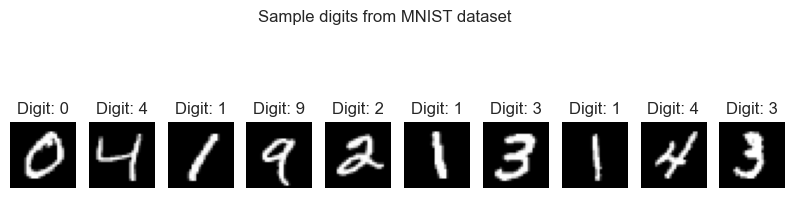

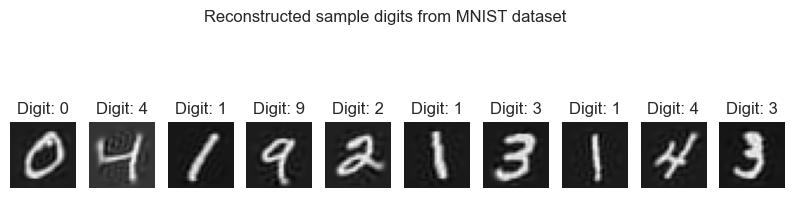

In [37]:
X_reconstructed = pca_model.inverse_transform(X_train_PCA)
visualize_samples(X_train, y_train, 'Sample digits from MNIST dataset', 10)
visualize_samples(X_reconstructed, y_train, 'Reconstructed sample digits from MNIST dataset', 10)

## ✨ Questions ✨

7. Do you see any difference between the original and the reconstructed images?
8. Why?

### Answers

*Write your answers here.*



## Classification after PCA

Create one classifier for the reduced dataset (lower dimensions with 95% variance) and the original one. Then, we evaluate the performance (accuracy) of both models.

In [38]:
def evaluate_classifier_performance(X_train_p: np.array, y_train_p: np.array, X_test_p: np.array, y_test_p: np.array,
                                    classifier: RandomForestClassifier) -> float:
    """
    Build and evaluate the performance of a classifier on a given dataset
    :param X_train_p: the training dataset
    :param y_train_p: the training labels
    :param X_test_p: the testing dataset
    :param y_test_p: the testing labels
    :param classifier: the classifier model
    :return: accuracy of the classifier
    """
    classifier.fit(X_train_p, y_train_p)
    y_pred = classifier.predict(X_test_p)
    accuracy = accuracy_score(y_test_p, y_pred)
    return accuracy


print("Building and evaluating RF classifier models...")
SAMPLES_TO_TRAIN_THE_CLASSIFIER = 1_000  # to speed up the process
rf_model = RandomForestClassifier(random_state=ramdom_state)
accuracy_original = evaluate_classifier_performance(X_train[:SAMPLES_TO_TRAIN_THE_CLASSIFIER],
                                            y_train[:SAMPLES_TO_TRAIN_THE_CLASSIFIER], X_test, y_test, rf_model)
accuracy_reduced = evaluate_classifier_performance(X_train_PCA[:SAMPLES_TO_TRAIN_THE_CLASSIFIER],
                                           y_train[:SAMPLES_TO_TRAIN_THE_CLASSIFIER],
                                                   pca_reduction(X_test, min_components)[0], y_test, rf_model)
print(f"\tAccuracy of the RF classifier on the original dataset: {accuracy_original:.4f}.")
print(f"\tAccuracy of the RF classifier on the PCA reduced dataset: {accuracy_reduced:.4f}.")

Building and evaluating RF classifier models...
	Accuracy of the RF classifier on the original dataset: 0.8806.
	Accuracy of the RF classifier on the PCA reduced dataset: 0.1763.


## ✨ Questions ✨

9. Is there an important difference between the accuracy of the classifier on the original dataset and the reduced one?
10. Why?

### Answers

*Write your answers here.*



## Classification after t-SNE

Let's try it out with t-SNE, just using three dimensions and the same classifier.

In [39]:
max_number_of_components_t_sne = 3  # t-SNE only allows up to 3 components
X_train_t_sne, t_sne_model = tsne_reduction(X_train[:SAMPLES_TO_TRAIN_THE_CLASSIFIER], max_number_of_components_t_sne)
print(f"Building and evaluating a RF classifier model with t-SNE (just {max_number_of_components_t_sne} dimensions)...")
accuracy_reduced = evaluate_classifier_performance(X_train_t_sne,
                                                   y_train[:SAMPLES_TO_TRAIN_THE_CLASSIFIER],
                                                   t_sne_model.fit_transform(X_test), y_test, rf_model)
print(f"\tAccuracy of the RF classifier on the original dataset: {accuracy_original:.4f}.")
print(f"\tAccuracy of the RF classifier on the t-SNE reduced dataset: {accuracy_reduced:.4f}.")


Building and evaluating a RF classifier model with t-SNE (just 3 dimensions)...
	Accuracy of the RF classifier on the original dataset: 0.8806.
	Accuracy of the RF classifier on the t-SNE reduced dataset: 0.3299.


## ✨ Questions ✨

11. What are the number of dimensions used by the classifiers after the PCA and t-SNE reductions?
Answer: PCA uses 154 dimensions, and t-SNE uses 3 dimensions.
12. What is the reduction technique that provides the best accuracy for the classifier?
Answer: t-SNE
13. Why do you think that is the case?
Answer: t-SNE is a non-linear technique, which is more suitable for this dataset. The original dataset is not linearly separable, as we saw in the visualization.

### Answers

*Write your answers here.*

